<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Описание проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

# Описание данных

**Признаки**
 - *RowNumber* — индекс строки в данных
 - *CustomerId* — уникальный идентификатор клиента
 - *Surname* — фамилия
 - *CreditScore* — кредитный рейтинг
 - *Geography* — страна проживания
 - *Gender* — пол
 - *Age* — возраст
 - *Tenure* — сколько лет человек является клиентом банка
 - *Balance* — баланс на счёте
 - *NumOfProducts* — количество продуктов банка, используемых клиентом
 - *HasCrCard* — наличие кредитной карты
 - *IsActiveMember* — активность клиента
 - *EstimatedSalary* — предполагаемая зарплата

**Целевой признак**
 - *Exited* — факт ухода клиента

## Подготовка данных

In [1]:
#pip install pandas-profiling

In [2]:
#pip install -U ipywidgets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import warnings
#import pandas_profiling
import random

C:\Users\2322\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>]],
      dtype=object)

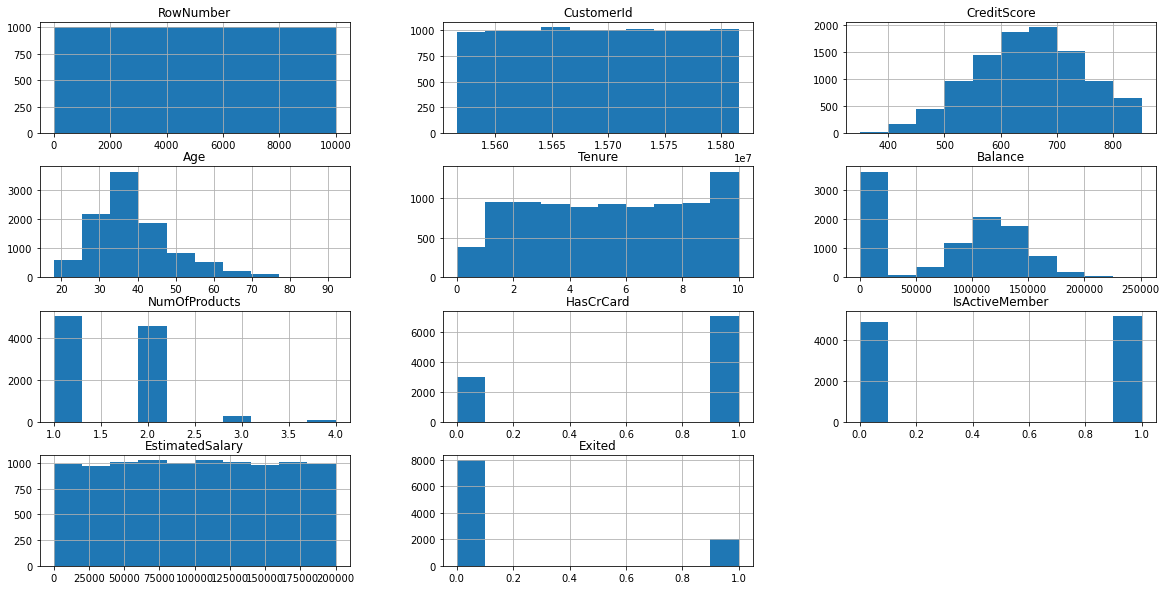

In [4]:
warnings.filterwarnings('ignore')

data = pd.read_csv('C:/Users/2322/Desktop/git/Churn.csv')
data.info()
data.head(2)
data.hist(figsize = (20,10))

#data.profile_report(title='Pandas Profiling Report', progress_bar=False)

<font color='teal'>

Целевой признак категориальный поэтому задача решаться будет с помощью классификации.
  
 - Выделим в Series целевой признак
 - Создадим отдельный DataFrame с признаками, при этом удалим бесполезные для предсказания столбцы, такие как: индекс строки в данных, фамилия и ID клиента
 - Приведем численные данные к единому формату
 - Заполним пропуски о количестве лет обслуживания случайными числами от 0 до 10. 
 - Для категориальных столбцов География и Пол используем прямое кодирование
</font>

In [5]:
target = data['Exited']
features = data.drop(['RowNumber', 'Surname', 'Exited', 'CustomerId'], axis = 1)
features['Age'] = features['Age'].astype('float')
features.loc[features['Tenure'].isnull(), 'Tenure'] = np.random.randint(0, 11, size = features['Tenure'].isnull().sum())
features = pd.get_dummies(features, columns = ['Geography', 'Gender'], drop_first = True)

<font color='teal'>
Разобъем датасет на обучающую, валидационную и тестовые выборки.
Для равномерного распределения классов в наборах данных используем параметр stratify = target.
</font>

In [6]:
features_train, features_vld, target_train, target_vld = train_test_split(features, target,
                                                                         train_size = 0.60, 
                                                                         random_state = 12345,
                                                                         stratify = target)
features_valid, features_test, target_valid, target_test = train_test_split(features_vld, target_vld,
                                                                         train_size = 0.5, 
                                                                         random_state = 12345,
                                                                         stratify = target_vld)

<font color='teal'>
Стандартизируем масштаб признаков в обучающей и валидационной выборках.
</font>

In [7]:
numeric_columns = ['Age', 'Tenure', 'Balance', 'EstimatedSalary', 'CreditScore', 'NumOfProducts']
scaler = StandardScaler()
scaler.fit(features_train[numeric_columns])
features_train[numeric_columns] = scaler.transform(features_train[numeric_columns], copy = False)
features_valid[numeric_columns] = scaler.transform(features_valid[numeric_columns], copy = False)
features_test[numeric_columns] = scaler.transform(features_test[numeric_columns], copy = False)

features_train.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2837,-1.040434,0.953312,0.347532,0.774657,-0.914708,0,1,-0.119110,1,0,0
9925,0.454006,-0.095244,-0.339290,1.910540,-0.914708,1,1,-0.258658,0,0,0


## Исследование задачи

<font color='teal'>
Для уменьшения количества кода в проекте используются функции:    

- metrics считает основные метрики модели
- DecisionTreeClassifier_model обучает модель с помощью алгоритма DecisionTreeClassifier
- RandomForestClassifier_model обучает модель с помощью алгоритма RandomForestClassifier

</font>

In [8]:
result = []

def metrics (model, feature, target):
    predicted = model.predict(feature)   
    accuracy = accuracy_score(target, predicted)
    recall = recall_score(target, predicted)
    precision = precision_score(target, predicted)
    f1 = f1_score(target, predicted)  
    probabilities = model.predict_proba(feature)[:,1]
    roc_auc = roc_auc_score(target, probabilities)
    return accuracy, recall, precision, f1, roc_auc, model
    
def DecisionTreeClassifier_model (depth, features, target, class_weight=None):
    model = DecisionTreeClassifier(random_state = 12345, criterion = 'gini',class_weight = class_weight, max_depth = depth)
    model.fit(features, target)
    return model

def RandomForestClassifier_model (depth, est, features, target, class_weight=None):
    model = RandomForestClassifier(random_state = 12345, n_estimators = est, criterion = 'gini', max_depth = depth, class_weight = class_weight)
    model.fit(features, target)
    return model

<font color='teal'>
Обучим модель с помощью алгоритма DecisionTreeClassifier. Модель с наилучшим показателем f1 сохраним в result.
</font>

In [9]:
%%time
list_result = []
for depth in range(2,20):
    list_result.append([*metrics(DecisionTreeClassifier_model(depth, features_train, target_train), 
                                 features_valid, target_valid)
                       ])
    
result.append(['DecisionTree', *max(list_result[:], key = lambda x: x[-3])])

Wall time: 547 ms


<font color='teal'>
Обучим модель с помощью алгоритма RandomForestClassifier. Модель с наилучшим показателем f1 сохраним в result.
</font>

In [10]:
%%time
list_result = []
for est in range(2,20):
    for depth in range(2,20):
        list_result.append([*metrics(RandomForestClassifier_model(est, depth, features_train, target_train), 
                                     features_valid, target_valid)
                       ])    

result.append(['RandomForest', *max(list_result[:], key = lambda x: x[-3])])

Wall time: 24.2 s


<font color='teal'>
Обучим модель с помощью алгоритма LogisticRegression. Модель и метрики сохраним в result.
</font>

In [11]:
%%time
model = LogisticRegression(random_state = 12345)
model.fit(features_train, target_train)
result.append(['LogisticRegression', *[*metrics(model, features_valid, target_valid)]])

Wall time: 58.6 ms


<font color='teal'>
Рассмотрим результаты.
</font>

In [12]:
pd.DataFrame(result, columns = ['name', 'accuracy', 'recall', 'precision', 'f1', 'roc_auc','model']).loc[:, ['name', 'accuracy', 'recall', 'precision', 'f1', 'roc_auc']]

,name,accuracy,recall,precision,f1,roc_auc
0,DecisionTree,0.8600,0.502451,0.726950,0.594203,0.825287
1,RandomForest,0.8665,0.551471,0.728155,0.627615,0.846153
2,LogisticRegression,0.8115,0.208333,0.611511,0.310786,0.787510


In [13]:
target_const = pd.Series(np.array([0]*len(target_train)))
print ('Test score:', accuracy_score(target_train, target_const))

Test score: 0.7963333333333333


In [14]:
target_train.value_counts(normalize = True)

0    0.796333
1    0.203667
Name: Exited, dtype: float64

<font color='teal'>
В таблице отобраны наилучшие модели по каждому из алгоритмов.

- Модель, полученная  с помощью алгоритма DecisionTree демонстрирует высокую производительность и максимальные значения по метрикам: доля правильных ответов и точность.
- Модель, полученная  с помощью алгоритма RandomForest демонстрирует максимальное значение по метрике f1 и roc_auc. Т.е. качество предсказаний у этой модели выше, чем у остальных, но производительность значительно ниже
- Самой оптимальной, с точки знания производительности, является модель обученная с помощью алгоритма LogisticRegression, но метрики качества у нее намного хуже, чем у остальных моделей	

Для случайной выборки из нулей (target_const) доля правильных ответов состави почти 80%, что ненамного меньше чем у моделей, проверенных на валидационной выборке. В данном проекте наблюдается сильный дисбаланс классов (79,6% - (-) класс и всего 20,3% - (+), что сказывается негативно на обучении модели.
</font>

## Борьба с дисбалансом

<font color='teal'>
 Сбалансируем классы несколькими вариантами и посмотрим, как будет меняться метрика f1.   
</font>    

In [15]:
models = [
    ['DecisionTree_model_balanced', 'RandomForest_model_balanced', 'LogisticRegression_model_balanced'],
    ['DecisionTree_model_upsample', 'RandomForest_model_upsample', 'LogisticRegression_model_upsample'],
    ['DecisionTree_model_downsample', 'RandomForest_model_downsample', 'LogisticRegression_model_downsample'],
]


def uppend_result (name_model, features, target, class_weight=None):
    result.append([name_model[0], *[*metrics(DecisionTreeClassifier_model(result[0][-1].max_depth, features, target, class_weight=class_weight), 
                                                              features_valid, target_valid)]]) 

    result.append([name_model[1], *[*metrics(RandomForestClassifier_model(result[1][-1].n_estimators, result[1][-1].max_depth, features, target, class_weight=class_weight), 
                                                              features_valid, target_valid)]])

    model = LogisticRegression(random_state = 12345, class_weight=None)
    model.fit(features, target)
    result.append([name_model[-1], *[*metrics(model, features_valid, target_valid)]])

<font color='teal'>
 Сбалансируем вес каждого класса с помощью гиперпараметра class_weight.  
</font> 

In [16]:
uppend_result (models[0], features_train, target_train, class_weight='balanced')

<font color='teal'>
 Увеличим выборку с объектами (+) класса.
</font>

In [17]:
repeat = 4
features_upsample = pd.concat([features_train[target_train==0]]+
                              [features_train[target_train==1]]*repeat)
target_upsample = pd.concat([target_train[target_train==0]]+
                              [target_train[target_train==1]]*repeat)

print (target_upsample.value_counts(normalize = True))
features_upsample, target_upsample = shuffle(features_upsample, target_upsample, random_state = 12345)

1    0.50569
0    0.49431
Name: Exited, dtype: float64


In [18]:
uppend_result (models[1], features_upsample, target_upsample)

<font color='teal'>
 Уменьшим выборку с объектами (-) класса.
</font> 

In [19]:
fraction = 0.25
features_downsample = pd.concat([features_train[target_train==0].sample(frac = fraction, random_state = 12345)]+
                              [features_train[target_train==1]])
target_downsample = pd.concat([target_train[target_train==0].sample(frac = fraction, random_state = 12345)]+
                              [target_train[target_train==1]])

features_downsample, target_downsample = shuffle(features_downsample, target_downsample, random_state = 12345)
target_downsample.value_counts(normalize = True)

1    0.505795
0    0.494205
Name: Exited, dtype: float64

In [20]:
uppend_result (models[-1], features_downsample, target_downsample)

pd.DataFrame(result, columns = ['name', 'accuracy', 'recall', 'precision', 'f1', 'roc_auc','model']).loc[:, ['name', 'accuracy', 'recall', 'precision', 'f1', 'roc_auc']]

,name,accuracy,recall,precision,f1,roc_auc
0,DecisionTree,0.8600,0.502451,0.726950,0.594203,0.825287
1,RandomForest,0.8665,0.551471,0.728155,0.627615,0.846153
2,LogisticRegression,0.8115,0.208333,0.611511,0.310786,0.787510
3,DecisionTree_model_balanced,0.7645,0.774510,0.454676,0.572983,0.817628
4,RandomForest_model_balanced,0.8485,0.605392,0.634961,0.619824,0.853545
5,LogisticRegression_model_balanced,0.8115,0.208333,0.611511,0.310786,0.787510
6,DecisionTree_model_upsample,0.7650,0.774510,0.455331,0.573503,0.818216
7,RandomForest_model_upsample,0.8310,0.700980,0.569721,0.628571,0.857877
8,LogisticRegression_model_upsample,0.7255,0.742647,0.405622,0.524675,0.793740
9,DecisionTree_model_downsample,0.7705,0.774510,0.462665,0.579285,0.835102


In [21]:
max(result[3:], key = lambda x: x[-3])

['RandomForest_model_upsample',
 0.831,
 0.7009803921568627,
 0.5697211155378487,
 0.6285714285714286,
 0.8578770075869544,
 RandomForestClassifier(max_depth=11, n_estimators=17, random_state=12345)]

<font color='teal'>

- Как видно из таблицы, наиболее высоких показателей качества (метрика f1) у моделей обученных с помощью алгоритмов RandomForest и DecisionTree удалось достичь увеличив (+) класс в обучающей выборке до 50% с использованием техники upsampling. 

- Устранение дисбаланса классов до обучения модели с помощью алгоритма LogisticRegression позволило увеличить  показатель качества (метрика f1) модели с 0,3 до 0,52. 

- Выборка с данными имеет небольшой размер (10000 строк), что не сильно сказывается на производительности. Поэтому, для предсказания предлагаю использовать модель обученную с помощью алгоритма RandomForestClassifier, т.к. именно она показывает наиболее высокое качество предсказания из всех рассмотренных моделей, предварительно устранив дисбаланс классов.
</font> 

## Тестирование модели

<font color='teal'>
Путем перебора значений порога, для лучшей модели, построим кривую ошибок и рассчитаем площадь под ней для тестовой выборки    
</font> 

In [22]:
model = max(result[:], key = lambda x: x[-3])[-1]
model.fit(features_upsample, target_upsample)
probabilities = model.predict_proba(features_test)[:,1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities)

Text(0, 0.5, 'True Positive Rate')

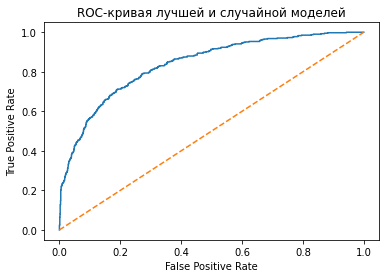

In [23]:
plt.title('ROC-кривая лучшей и случайной моделей')
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [24]:
print ('Результаты тестирования модели')
pd.DataFrame(metrics(model, features_test, target_test)[:-1], index = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']).transpose()

Результаты тестирования модели


,accuracy,recall,precision,f1,roc_auc
0,0.8165,0.63145,0.542194,0.583428,0.83777


<font color='teal'>
 AUC-ROC (площадь под кривой ошибок) случайной модели равна 0,5, а для нашей лучшей модели - 0,843. что говорит о умении предсказывать выбранной модели.
 На тестовой выборке f1>0.59. Результат достигнут.
</font> 

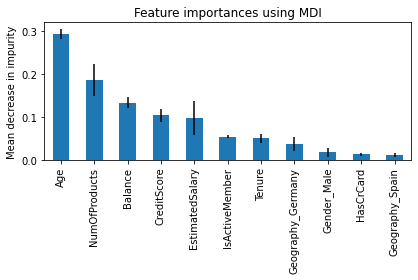

In [25]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
model_importances = pd.Series(importances, index = features.columns)

fig, ax = plt.subplots()
model_importances.sort_values(ascending=False).plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

## LinearSVC

<font color='teal'>
Дополнительно посмотрим, как изменится качество предсказания, если мы будет использовать алгоритм LinearSVC
</font> 

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

In [27]:
svc_l = LinearSVC(C = 30, loss = 'hinge', tol = 0.000001, random_state = 12345)
model = CalibratedClassifierCV(svc_l) 
model.fit(features_upsample, target_upsample)

CalibratedClassifierCV(base_estimator=LinearSVC(C=30, loss='hinge',
                                                random_state=12345, tol=1e-06))

In [28]:
probabilities_valid = model.predict_proba(features_test)[:,1]
roc_auc = roc_auc_score(target_test, probabilities_valid)
print ('ROC_AUC:', roc_auc)
f1 = f1_score(target_test, model.predict(features_test)) 
print ('F1:', f1)

ROC_AUC: 0.7569109941991299
F1: 0.4852173913043478


<font color='teal'>
Модель, обученная с помощью LinearSVC, демонстрирует более низкие показатели качества, чем предыдущие рассмотренные модели. 
</font> 

## Вывод

<font color='teal'>
    
- Наилучшие показали качества (f1 = 0.5944, доля правильных ответов = 0,826) продемонстрировала модель обученная на выборке с увеличенным до 50% редким классом с помощью алгоритма случайное дерево с гиперпараметрами, max_depth=17, n_estimators=11. ROC AUC случайного леса показало значения в диапазоне 0,8437 - относительно близко к 1 и больше 0,5, что говорит о некотором умении предсказывать.
   
- Самыми важными признаками для предсказания являются: возраст и количество продуктов банка, используемых клиентом
</font> 